In [2]:
import pandas as pd                #import the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv')      #read the data set

In [4]:
data.drop(['ID','Speed_10'],axis=1,inplace=True)     #remove the unnecessary coloumn

In [5]:
Gend = pd.get_dummies(data['Gender'],drop_first=True)   #gender is converted into numerical values

In [6]:
Stud=pd.get_dummies(data['Study'])  #study is converted into numerical values

In [7]:
Grou=pd.get_dummies(data['Group'],drop_first=True)  #group(Ga,Ju,Si) is converted into numerical values

In [8]:
data.drop(['Gender','Study','Group'],axis=1,inplace=True)  #drop the features to convert into numerical values

In [9]:
data = pd.concat([data,Gend,Stud,Grou],axis=1)  #The new numerical features were replaced

In [10]:
data.drop(['Weight (kg)','HoehnYahr','UPDRS','UPDRSM'],axis = 1,inplace = True) #drop the unnecessary features

In [11]:
X = data.drop(['PD'], axis = 1)  #define the features as X 

In [12]:
y = data['PD']   #define the label as Y

In [13]:
from sklearn.model_selection import train_test_split  #import the data selection libraries

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) #data seperation for training testing

In [15]:
#Normalization

In [16]:
min_train = X_train.min() #get the minimum values of training features

In [17]:
range_train = (X_train-min_train).max()   #get range of the data features

In [18]:
X_train_scaled = (X_train-min_train)/range_train #normalizing the features

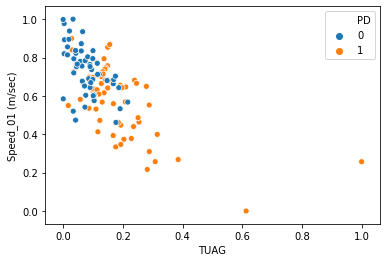

In [19]:
sns.scatterplot( x = X_train_scaled['TUAG'], y =X_train_scaled ['Speed_01 (m/sec)'],hue = 'PD', data = data) #viasualize the particular faetures after normalization

In [20]:
min_test = X_test.min()          #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [21]:
from sklearn.neighbors import KNeighborsClassifier #import the kNN algorithm

In [22]:
knn = KNeighborsClassifier(n_neighbors=1) #set the paramenter of the kNN

In [23]:
knn.fit(X_train_scaled, y_train) #training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
y_predict = knn.predict(X_test_scaled) #test the model performance 

In [25]:
from sklearn.metrics import classification_report,confusion_matrix #import the performance evaluavtion matrices

In [26]:
cm = confusion_matrix(y_test, y_predict)  #define the confusion matrix as cm

(2, 0)

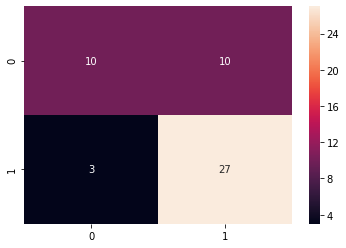

In [27]:
sns.heatmap(cm, annot=True)   #visualize the confusion matrix
plt.ylim(2,0)

In [28]:
print(confusion_matrix(y_test,y_predict))  #print the performance of the algorithm
print(classification_report(y_test, y_predict))

[[10 10]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.73      0.90      0.81        30

    accuracy                           0.74        50
   macro avg       0.75      0.70      0.71        50
weighted avg       0.75      0.74      0.73        50



In [29]:
#improvement of KNN

In [30]:
error_rate = []  #finding the optimum vale of k

for i in range (1,73):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_predict = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_predict != y_test))

Text(0, 0.5, 'Error Rate')

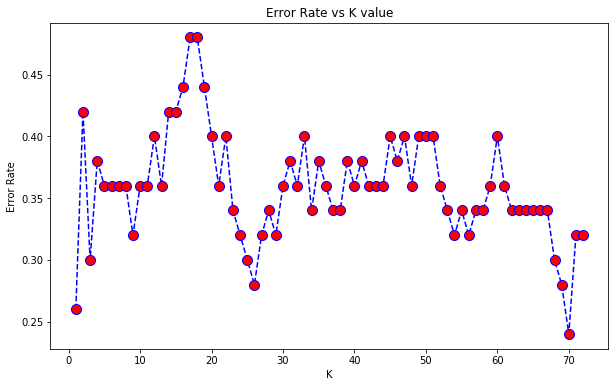

In [31]:
plt.figure(figsize=(10,6))  #visualize the k vale with the respect to error rate
plt.plot(range(1,73),error_rate,color='blue',linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# redefine the parameter of the kNN model( K=70 )
knn = KNeighborsClassifier(n_neighbors=70)

knn.fit(X_train_scaled, y_train)  #train the model
y_predict = knn.predict(X_test_scaled) #test the model performance

print('WITH K=70') #model performance results
print('\n')
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))

WITH K=68


[[ 8 12]
 [ 0 30]]


              precision    recall  f1-score   support

           0       1.00      0.40      0.57        20
           1       0.71      1.00      0.83        30

    accuracy                           0.76        50
   macro avg       0.86      0.70      0.70        50
weighted avg       0.83      0.76      0.73        50



In [33]:
cm = confusion_matrix(y_test, y_predict)  #define the confusion matrix as cm

(2, 0)

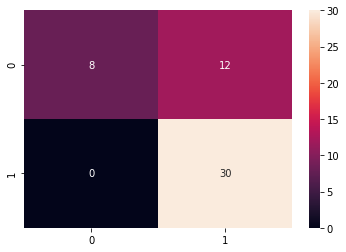

In [34]:
sns.heatmap(cm, annot=True)  #visualize the confusion matrix
plt.ylim(2,0)